# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import mpl_toolkits.mplot3d

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
#import inauguralproject
from HouseholdSpecializationModel import  HouseholdSpecializationModelClass
# We import our class as model
model = HouseholdSpecializationModelClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Illustrate how $HF/HM$ changes when varying α ∈{0.25,0.50,0.75} and σ = {0.5,1.0,1.5}.

In [64]:
# Defining alphas and sigmas
alphas = [0.25, 0.50, 0.75]
sigmas = [0.5, 1, 1.5]

# Creating empty HM and HF lists

HF_list = []
HM_list = []

for i in alphas:
    for j in sigmas:
        model.par.alpha = i
        model.par.sigma = j
         # solve model discretely
        opt = model.solve_discrete()
        
        # append optimal HM and HF values to lists
        HM_list.append(opt.HM)
        HF_list.append(opt.HF)

#Converting the lists into numpy arrays, to use numpy functions

HFarray = np.array(HF_list)
HMarray = np.array(HM_list) 

# Dividing by eachother
HFHMarray = HFarray/HMarray

# Reshaping the array to a matrix with alpha on the rows and sigma on the columns
HF_HM_matrix = HFHMarray.reshape(len(alphas), len(sigmas))

print(HF_HM_matrix)


/Users/tobiasbeyer/Desktop/Polit/3. Semester/Prog/projects-2023-jt/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  
/Users/tobiasbeyer/Desktop/Polit/3. Semester/Prog/projects-2023-jt/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: invalid value encountered in reciprocal
  
/Users/tobiasbeyer/Desktop/Polit/3. Semester/Prog/projects-2023-jt/inauguralproject/HouseholdSpecializationModel.py:65: RuntimeWarning: invalid value encountered in reciprocal
  Q = C**par.omega*H**(1-par.omega)


[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


Setting up a table that shows the evolution of the HF/HM relationship for the different values of alpha and sigma

|   | $\sigma=0.5$ | $\sigma=1$   | $\sigma=1.5$ |
|---|--------------|--------------|---------------|
| $\alpha=0.25$ | 0.545         | 0.308       | 0.214         |
| $\alpha=0.50$ | 1.000         | 1.000       | 1.000         |
| $\alpha=0.75$ | 1.833         | 3.250       | 4.667         |

# Question 2

plotting $Wf/Wm$ ratio

For the next tast we are resetting our alpha and sigma values back to the starting and then we are calling our solve_wF_vec function to plot the results

/Users/tobiasbeyer/Desktop/Polit/3. Semester/Prog/projects-2023-jt/inauguralproject/HouseholdSpecializationModel.py:65: RuntimeWarning: invalid value encountered in reciprocal
  Q = C**par.omega*H**(1-par.omega)


HM Vector:[4.  4.5 4.5 4.5 5. ]
HF Vector:[5.  4.5 4.5 4.  4. ]
wF Vector:[0.8 0.9 1.  1.1 1.2]


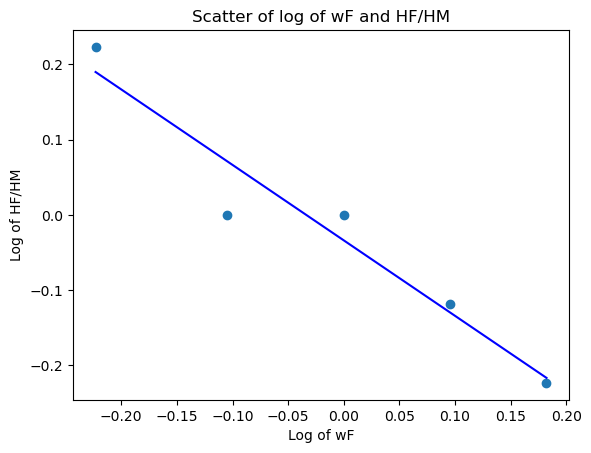

Beta0 = -0.033750863257460545, Beta1 = -1.001945070265816


In [72]:
model.par.alpha = 0.5
model.par.sigma = 1
model.solve_wF_vec(discrete=True, do_plot=True, do_print=True)
model.run_regression(print_beta=True)

# Question 3

Plot the $Wf / Wm$ ratio for the continuous values 

HM Vector:[4.09251206 4.27104213 4.45450509 4.64194037 4.83260414]
HF Vector:[5.11568981 4.74563915 4.45453136 4.21995238 4.02722718]
wF Vector:[0.8 0.9 1.  1.1 1.2]


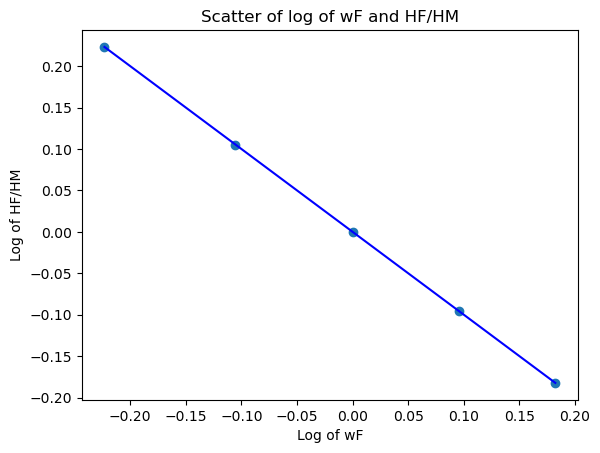

Beta0 = 7.834249715326825e-06, Beta1 = -0.9999985998006411


In [73]:
model.solve_wF_vec(do_plot=True, do_print=True)
model.run_regression(print_beta=True)


# Question 4

Choose $\alpha$ and $\sigma$ such that it minimizes the expression. Illustrate how the model fit the data and discuss the economic interpretation of the results.

/Users/tobiasbeyer/Desktop/Polit/3. Semester/Prog/projects-2023-jt/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tobiasbeyer/Desktop/Polit/3. Semester/Prog/projects-2023-jt/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: overflow encountered in double_scalars
  


alpha = 0.9820
sigma = 0.1000
beta0 = 0.4000
beta1 = -0.1000
R-squared = 0.0000


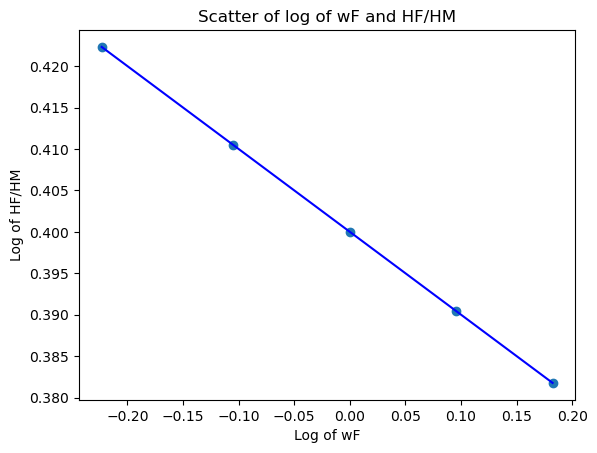

Beta0 = 0.39999680358711903, Beta1 = -0.09998494877365302


In [76]:

model.estimate(do_print=True)
model.solve_wF_vec(do_plot=True)
model.run_regression(print_beta=True)

# Question 5

ADD CONCISE CONLUSION.